# Example stucture of json file


- minus - is done
- plus  - is need to extract again

## Data

```
0:{24 items
"title":string"Programista" ---
"street":string"Centrum" ---
"city":string"Gądki" ---
"country_code":string"PL" ----
"address_text":string"Centrum, Gądki" -------
"marker_icon":string"html"   ---------
"workplace_type":string"remote"            -------
"company_name":string"Hendi Polska Sp. z o.o"      --------
"company_url":string"https://hendi.com/pl"       ----------
"company_size":string"200"       -----------
"experience_level":string"mid"             -------------
"latitude":string"52.3119631"       ---------
"longitude":string"17.0469138"  ------------
"published_at":string"2022-10-15T16:00:09.675Z"  ------------
"remote_interview":boolfalse            --------------
"open_to_hire_ukrainians":boolfalse              ---------------
"id":string"hendi-polska-sp-z-o-o-programista-e12ae844-b2eb-4210-9858-f3c32f6b4050"         --
"display_offer":booltrue        ---------------
"employment_types":[2 items +++++
                    0:{2 items+++++++
                    "type":string"permanent" ++++++++++
                    "salary":{3 items ++++++++
                    "from":int9600 +++++++
                    "to":int9600 +++++++
                    "currency":string"pln" +++++
                    }
                    }
                    1:{2 items +++++++
                    "type":string"b2b" +++++++
                    "salary":{3 items +++++++
                    "from":int9600 +++++++
                    "to":int9600  +++++++
                    "currency":string"pln" +++++++
                    }
                    }
                ]
"company_logo_url":string"https://bucket.justjoin.it/offers/company_logos/thumb/9868a74427e4720c69c242ec518c926a3346b958.jpg?1664551501" ---------
"skills":[3 items +++++++ 
            0:{2 items +++++++
            "name":string"SQL" +++++++
            "level":int2 +++++++
            }  +++++++
            1:{2 items  +++++++
            "name":string".Net" +++++++
            "level":int3 +++++++
            }  +++++++
            2:{2 items +++++++
            "name":string"C#" +++++++
            "level":int3 +++++++
            }
         ]
"remote":booltrue  ----------
"multilocation":[1 item
                0:{3 items   +++++++
                "city":string"Gądki" +++++++
                "street":string"Centrum" +++++++
                "slug":string"hendi-polska-sp-z-o-o-programista-e12ae844-b2eb-4210-9858-f3c32f6b4050"  +++++++
                }
           ]
"way_of_apply":string"form"  -------
}

```

In [1]:
%pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 5.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840629 sha256=6d49f41ee8ee3a264e4c946271540e154873dcd5386b624983c0655d087cf917
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


In [2]:
from IPython.display import display
import pandas as pd
import numpy as np
import polars as pl
import json
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from pyspark import SparkContext
import pyspark

import os
import warnings

warnings.filterwarnings('ignore')

In [3]:
# setup pyspark session
spark = SparkSession.builder \
    .appName("big_data_project") \
    .config("spark.executor.memory", "20g") \
    .config("spark.driver.memory", "20g") \
    .getOrCreate()

spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

# Set the log level to WARN to hide warnings
spark.sparkContext.setLogLevel("OFF")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/08 11:12:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
paths_2021 = dict()
paths_2022 = dict()
paths_2023 = dict()

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if '2021' in path.split('/')[-1]:
            l = len(spark.read.json(path).columns)
            if l in paths_2021.keys():
                paths_2021[l] += [path]
            else:
                paths_2021[l] = [path]
        elif '2022' in path.split('/')[-1]:
            l = len(spark.read.json(path).columns)
            if l in paths_2022.keys():
                paths_2022[l] += [path]
            else:
                paths_2022[l] = [path]
        elif '2023' in path.split('/')[-1]:
            l = len(spark.read.json(path).columns)
            if l in paths_2023.keys():
                paths_2023[l] += [path]
            else:
                paths_2023[l] = [path]

print('Number of days in 2021 : ', paths_2021.keys(), '. Number of columns 20')
print('Number of days in 2022 : ', paths_2022.keys(), '. Number of columns [20, 21, 23, 24]')
print('Number of days in 2023 : ', paths_2023.keys(), '. Number of columns 24')

In [ ]:
# initialize an empty DataFrame
combined_df_2021_20 = spark.read.json(paths_2021[20][0])

# read json files and combine them all into one file
for path in paths_2021[20][1:]:
    df = spark.read.json(path)
    combined_df_2021_20 = combined_df_2021_20.unionByName(df, allowMissingColumns = True)


# combined_df_2021_20 = combined_df_2021_20.withColumn("index", monotonically_increasing_id())

# combined_df_2021_20.show(10)

In [ ]:
# initialize an empty DataFrame
combined_df_2022_20 = spark.read.json(paths_2022[20][0])

# read json files and combine them all into one file
for path in paths_2022[20][1:]:
    df = spark.read.json(path)
    combined_df_2022_20 = combined_df_2022_20.unionByName(df, allowMissingColumns = True)


# combined_df_2022_20.show(10)

In [ ]:
# 2022, 21 columns dfs
combined_df_2022_21 = spark.read.json(paths_2022[21][0])

# read json files and combine them all into one file
for path in paths_2022[21][1:]:
    df = spark.read.json(path)
    combined_df_2022_21 = combined_df_2022_21.unionByName(df, allowMissingColumns = True)


# combined_df_2022_21.show(10, truncate = False)

In [ ]:
# 2022, 23 columns dfs
combined_df_2022_23 = spark.read.json(paths_2022[23][0])

# read json files and combine them all into one file
for path in paths_2022[23][1:]:
    df = spark.read.json(path)
    combined_df_2022_23 = combined_df_2022_23.unionByName(df, allowMissingColumns = True)


# combined_df_2022_23.show(10)

In [9]:
# 2022, 24 columns dfs
combined_df_2022_24 = spark.read.json(paths_2022[24][0])

# read json files and combine them all into one file
for path in paths_2022[24][1:]:
    df = spark.read.json(path)
    combined_df_2022_24 = combined_df_2022_24.unionByName(df, allowMissingColumns = True)


# combined_df_2022_24.show(10)

In [10]:
# 2022, 24 columns dfs
combined_df_2023_24 = spark.read.json(paths_2023[24][0])

# read json files and combine them all into one file
for path in paths_2023[24][1:]:
    df = spark.read.json(path)
    combined_df_2023_24 = combined_df_2023_24.unionByName(df, allowMissingColumns = True)

# combined_df_2023_24.show(10)

## Extraction of nested columns

In [11]:
# _________________________________________________________________
# extraction of nested columns upto 2022_21

def extraction1(df: spark.table) -> spark.table:
    df = (df

        # extract skills
        .withColumn(
            "skills_extracted",
            expr("transform(skills, x -> concat(x.name, ': ', x.level))")
        )

        # size of skills extraction
        .withColumn('skills_count', size('skills_extracted'))
          
        # extract employment types with salary details
        .withColumn(  
            "employment_types_extracted",
            expr("""
                transform(employment_types, x -> 
                    concat_ws(';', x.type, x.salary.currency, x.salary.from, x.salary.to)
                    )
            """)
        )

        # size of emp_type extraction
        .withColumn('emp_type_count', size('employment_types_extracted'))
        .drop('multilocation', 'skills', 'employment_types')

        .withColumn('employment_types', concat_ws(', ', 'employment_types_extracted'))
        .withColumn('skill_1', col('skills_extracted')[0])
        .withColumn('skill_2', col('skills_extracted')[1])
        .withColumn('skill_3', col('skills_extracted')[2])
          
        .drop('employment_types_extracted', 'skills_extracted')
    )

    return df


# _________________________________________________________________
# extraction of nested columns for 2022_23 and rest

def extraction(df: spark.table) -> spark.table:
    df = (df

        # extract skills
        .withColumn(
            "skills_extracted",
            expr("transform(skills, x -> concat(x.name, ': ', x.level))")
        )

        # size of skills extraction
        .withColumn('skills_count', size('skills_extracted'))
          
        # extract employment types with salary details
        .withColumn(  
            "employment_types_extracted",
            expr("""
                transform(employment_types, x -> 
                    concat_ws(';', x.type, x.salary.currency, x.salary.from, x.salary.to)
                    )
            """)
        )

        # size of emp_type extraction
        .withColumn('emp_type_count', size('employment_types_extracted'))

        # extract multilocation information, multilocation column is combination of x.city, x.slug and x.street. x.slug format: id + (x.city). sometimes x.slug contains x.city at the end of id column 
        # id: detable-starszy-analityk-systemowo-biznesowy, x.slug 1st condition: detable-starszy-analityk-systemowo-biznesowy, x.slug 2nd condition: detable-starszy-analityk-systemowo-biznesowy-poznan
        .withColumn(
            "multilocation_extracted",
            expr("transform(multilocation, x -> concat(x.city, '-', x.street))")
        )
          
        # size of multi_loc extraction
        .withColumn('multi_loc_count', size('multilocation_extracted'))
          
        .drop('multilocation', 'skills', 'employment_types')

        .withColumn('employment_types', concat_ws(', ', 'employment_types_extracted'))
        .withColumn('multilocation', concat_ws(', ', 'multilocation_extracted'))
        
        # there are maximum 3 skills per job post, so I will create 3 separate columns for each skill
        .withColumn('skill_1', col('skills_extracted')[0])
        .withColumn('skill_2', col('skills_extracted')[1])
        .withColumn('skill_3', col('skills_extracted')[2])
        
        # address_text column is built as "street + ', ' + city" format, which means it doesn't valuable to keep
        .drop('employment_types_extracted', 'skills_extracted', 'multilocation_extracted')
        
    )

    return df

# Split skill and Employment type to different columns

In [12]:
# splitting skills and employment types
def skill_splitter(export_df):
    
    export_df = (export_df
                .withColumn('skill_1_level', split(col('skill_1'), ':').getItem(1).cast('integer'))
                .withColumn('skill_2_level', split(col('skill_2'), ':').getItem(1).cast('integer'))
                .withColumn('skill_3_level', split(col('skill_3'), ':').getItem(1).cast('integer'))
                .withColumn('skill_1', trim(split(col('skill_1'), ':').getItem(0)))
                .withColumn('skill_2', trim(split(col('skill_2'), ':').getItem(0)))
                .withColumn('skill_3', trim(split(col('skill_3'), ':').getItem(0)))
                )
    
    return export_df


# create column based on contract types: b2b, mandate and permanent contract
def employment_type_splitter(export_df):

    export_df = (export_df
                .withColumn('contract_1', split(col('employment_types'), ',').getItem(0))
                .withColumn('contract_2', split(col('employment_types'), ',').getItem(1))
                .withColumn('contract_3', split(col('employment_types'), ',').getItem(2))
                .withColumn('b2b',  when(trim(split(col('contract_1'), ';').getItem(0)) == 'b2b', split(col('contract_1'), ';'))
                                   .when(trim(split(col('contract_2'), ';').getItem(0)) == 'b2b', split(col('contract_2'), ';'))
                                   .when(trim(split(col('contract_3'), ';').getItem(0)) == 'b2b', split(col('contract_3'), ';'))
                                   .otherwise(None)
                           )
                .withColumn('permanent', when(trim(split(col('contract_1'), ';').getItem(0)) == 'permanent', split(col('contract_1'), ';'))
                                        .when(trim(split(col('contract_2'), ';').getItem(0)) == 'permanent', split(col('contract_2'), ';'))
                                        .when(trim(split(col('contract_3'), ';').getItem(0)) == 'permanent', split(col('contract_3'), ';'))
                                        .otherwise(None)
                           )

                .withColumn('mandate',   when(trim(split(col('contract_1'), ';').getItem(0)) == 'mandate_contract', split(col('contract_1'), ';'))
                                        .when(trim(split(col('contract_2'), ';').getItem(0)) == 'mandate_contract', split(col('contract_2'), ';'))
                                        .when(trim(split(col('contract_3'), ';').getItem(0)) == 'mandate_contract', split(col('contract_3'), ';'))
                                        .otherwise(None)
                           )

                # b2b contract type splitting
                .withColumn('b2b_currency', col('b2b')[1])
                .withColumn('b2b_from', col('b2b')[2])
                .withColumn('b2b_to', col('b2b')[3])

                # permanent contract type splitting
                .withColumn('permanent_currency', col('permanent')[1])
                .withColumn('permanent_from', col('permanent')[2])
                .withColumn('permanent_to', col('permanent')[3])

                # mandate contract type splitting
                .withColumn('mandate_currency', col('mandate')[1])
                .withColumn('mandate_from', col('mandate')[2])
                .withColumn('mandate_to', col('mandate')[3])

                # drop useless columns
                .drop('contract_1', 'contract_2', 'contract_3', 'b2b', 'permanent', 'mandate', 'employment_types')
            )
    
    return export_df

In [13]:
# apply extraction functions to datasets
extracted_df_2021_20 = extraction1(combined_df_2021_20)
extracted_df_2022_20 = extraction1(combined_df_2022_20)
extracted_df_2022_21 = extraction1(combined_df_2022_21)
extracted_df_2022_23 = extraction(combined_df_2022_23)
extracted_df_2022_24 = extraction(combined_df_2022_24)
extracted_df_2023_24 = extraction(combined_df_2023_24)

In [14]:
# combine all data into one dataset
final_df = (extracted_df_2021_20.unionByName(extracted_df_2022_20, allowMissingColumns = True)
            .unionByName(extracted_df_2022_21, allowMissingColumns = True)
            .unionByName(extracted_df_2022_23, allowMissingColumns = True)
            .unionByName(extracted_df_2022_24, allowMissingColumns = True)
            .unionByName(extracted_df_2023_24, allowMissingColumns = True)
           )

# not usefull columns
drop_columns = ['address_text', 'company_logo_url', 'id', 'maker_icon', 'open_to_hire_ukrainians', 'remote', 'street']

export_df = (final_df
             .select(
            'country_code',
            'published_at',
            'city',
            'company_name',             # is it useful?
            'company_size',             # is it useful?
            'display_offer',
            'experience_level',
            'latitude',
            'longitude',
            'remote_interview',
            'title',
            'way_of_apply',
            'workplace_type',
            'skill_1',
            'skill_2',
            'skill_3',
            'skills_count',
            'employment_types',
            'emp_type_count',
            'multilocation',
            'multi_loc_count',
            )
            .withColumn('country_code', when(col('country_code') == 'Polska', 'PL').otherwise(col('country_code')).cast(VarcharType(2)))
            .withColumn('published_at', col('published_at').cast(DateType()))
           )

In [15]:
# apply skill splitter and contract type splitter functions
export_df_skill_splitted = skill_splitter(export_df)

export_df_final = employment_type_splitter(export_df_skill_splitted).select(
            'country_code',
            'published_at',
            'city',
            'company_name',             
            'company_size',             
            'display_offer',
            'experience_level',
            'latitude',
            'longitude',
            'remote_interview',
            'title',
            'way_of_apply',
            'workplace_type',
            'skills_count',
            'skill_1', 'skill_1_level',
            'skill_2', 'skill_2_level',
            'skill_3', 'skill_3_level',
            'emp_type_count',
            'b2b_currency', 'b2b_from', 'b2b_to',
            'permanent_currency', 'permanent_from', 'permanent_to',
            'mandate_currency', 'mandate_from', 'mandate_to',
            'multi_loc_count',
            'multilocation',
)

In [16]:
export_df_final.show(10, truncate = False)

+------------+------------+--------+-----------------+------------+-------------+----------------+----------+----------+----------------+---------------------------------+------------+--------------+------------+------------------+-------------+----------+-------------+------------------+-------------+--------------+------------+--------+------+------------------+--------------+------------+----------------+------------+----------+---------------+-------------+
|country_code|published_at|city    |company_name     |company_size|display_offer|experience_level|latitude  |longitude |remote_interview|title                            |way_of_apply|workplace_type|skills_count|skill_1           |skill_1_level|skill_2   |skill_2_level|skill_3           |skill_3_level|emp_type_count|b2b_currency|b2b_from|b2b_to|permanent_currency|permanent_from|permanent_to|mandate_currency|mandate_from|mandate_to|multi_loc_count|multilocation|
+------------+------------+--------+-----------------+------------+-

In [17]:
# export_df_final.explain(mode = 'cost')
# estimated size = 8.7  GiB

In [18]:
export_df_final.dtypes

[('country_code', 'string'),
 ('published_at', 'date'),
 ('city', 'string'),
 ('company_name', 'string'),
 ('company_size', 'string'),
 ('display_offer', 'boolean'),
 ('experience_level', 'string'),
 ('latitude', 'string'),
 ('longitude', 'string'),
 ('remote_interview', 'boolean'),
 ('title', 'string'),
 ('way_of_apply', 'string'),
 ('workplace_type', 'string'),
 ('skills_count', 'int'),
 ('skill_1', 'string'),
 ('skill_1_level', 'int'),
 ('skill_2', 'string'),
 ('skill_2_level', 'int'),
 ('skill_3', 'string'),
 ('skill_3_level', 'int'),
 ('emp_type_count', 'int'),
 ('b2b_currency', 'string'),
 ('b2b_from', 'string'),
 ('b2b_to', 'string'),
 ('permanent_currency', 'string'),
 ('permanent_from', 'string'),
 ('permanent_to', 'string'),
 ('mandate_currency', 'string'),
 ('mandate_from', 'string'),
 ('mandate_to', 'string'),
 ('multi_loc_count', 'int'),
 ('multilocation', 'string')]

In [19]:

# Decrease the number of partitions to 1
export_df_final_1 = export_df_final.coalesce(1)

# Save the DataFrame to a file (e.g., in CSV format)
export_df_final_1.write.parquet("final_data.parquet", mode='overwrite')


# Visualization for only *Big data job*

In [20]:
big_data_jobs = export_df_final.filter(lower(col('title')).like('%big%')).select('title', 'skill_1', 'skill_2', 'skill_3').toPandas()

big_data_jobs

,title,skill_1,skill_2,skill_3
0,Big Data Engineer,BigQuery,Azure,Python
1,Junior Big Data Platform Specialist,Azure / AWS / GCP,UNIX/LINUX,None
2,Senior/Lead Big Data Engineer,Scala,Spark,Hadoop
3,Senior/Lead Big Data Engineer,Scala,Spark,Hadoop
4,Senior/Lead Big Data Engineer,Scala,Spark,Hadoop
...,...,...,...,...
39869,Project Manager (AI & Big Data),Risk Management,Team Management,Project Management
39870,Project Manager (AI & Big Data),Risk Management,Team Management,Project Management
39871,Cloud Architect/Big Data Architect,Hadoop,Azure,AWS
39872,Cloud Architect/Big Data Architect,Hadoop,Azure,AWS


In [21]:
big_data_skills = pd.melt(big_data_jobs, id_vars = 'title', value_vars = ['skill_1', 'skill_2', 'skill_3'], value_name = 'skills', ignore_index = True)

In [32]:
import plotly.express as px

count_skills = big_data_skills.groupby('skills').count().reset_index()
top_skills = count_skills.sort_values(by='title', ascending=False).head(20)


fig = px.bar(top_skills, y = 'skills', x = 'title', color = 'skills', title = 'In demand skills under Big Data title' )

fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False,
                  marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

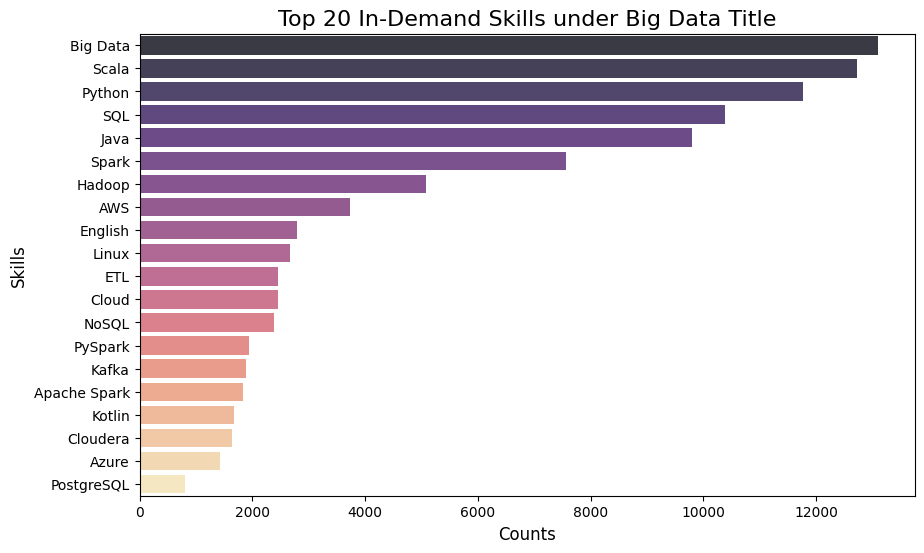

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

count_skills = big_data_skills.groupby('skills').count().reset_index()

top_skills = count_skills.sort_values(by='title', ascending=False).head(20)

# palette = sns.light_palette("blue", as_cmap = False, n_colors = len(top_skills))
palette = sns.color_palette("magma", n_colors = len(top_skills))

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=top_skills, y='skills', x='title', palette=palette, alpha=0.8)

bar_plot.set_title('Top 20 In-Demand Skills under Big Data Title', fontsize=16)
bar_plot.set_xlabel('Counts', fontsize=12)
bar_plot.set_ylabel('Skills', fontsize=12)

plt.savefig('top_20_in_demand_skills.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
